In [0]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the train test split
from sklearn.model_selection import train_test_split

# Import the algs
from sklearn.tree import DecisionTreeClassifier

# Read in the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]


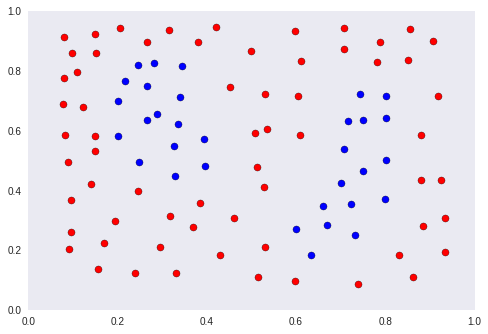

In [13]:
#Used to plot data in csv
def plot_points(X,y):
  plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
  plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.grid(False)
  plt.tick_params(
      axis='x',
      which='both',
      bottom=False,
      top=False)
  plt.show()
  
plot_points(X,y)

In [32]:
# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TODO: Create the decision tree model and assign it to the variable model.
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

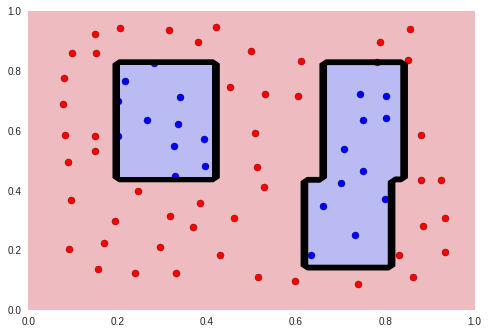

In [33]:
#Used to plot the resulting model
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which=False,
        bottom=False,
        top=False)

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()
 
plot_model(X_train,y_train,model)

In [34]:
# TODO: Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]


In [35]:
# TODO: Calculate the accuracy and assign it to the variable acc. on the test data
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9583333333333334
